In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics 
from sklearn.metrics import accuracy_score


In [15]:
data = pd.read_csv("food_price_inflation.csv")
data.head()

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
0,AFG,Afghanistan,2001-01-01,22.943765
1,AFG,Afghanistan,2001-02-01,24.357903
2,AFG,Afghanistan,2001-03-01,21.202933
3,AFG,Afghanistan,2001-04-01,17.301832
4,AFG,Afghanistan,2001-05-01,9.334624


In [16]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# Convert continuous target to categories (low, medium, high inflation)
y = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])
y = pd.factorize(y)[0]


In [17]:
cat_columns = x.select_dtypes(include= ['object']).columns
x[cat_columns] = x[cat_columns]. apply(lambda col: pd.factorize(col)[0])

In [18]:
x.head()

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4


In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, shuffle=False
)


In [20]:
results = {}

def evaluate_model(name, model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    acc = accuracy_score(y_test, pred)
    prec = metrics.precision_score(y_test, pred, average='weighted', labels=np.unique(pred))
    rec = metrics.recall_score(y_test, pred, average='weighted', labels=np.unique(pred))
    f1 = metrics.f1_score(y_test, pred, average='weighted', labels=np.unique(pred))

    results[name] = [acc, prec, rec, f1]


In [21]:
for clf, scores in results.items():
    print(clf, "=> Accuracy:", scores[0], " Precision:", scores[1], " Recall:", scores[2], " F1:", scores[3])


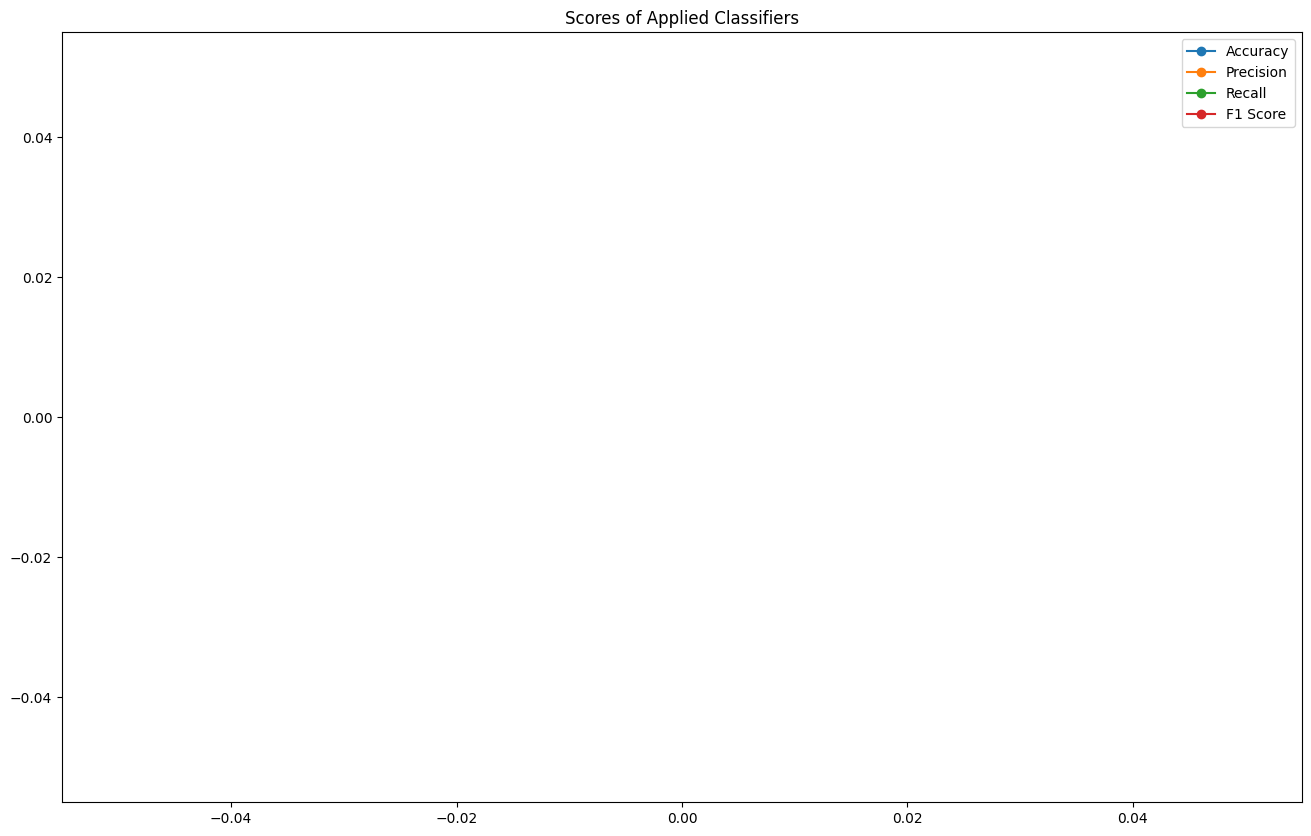

In [22]:
plt.figure(figsize=(16, 10))

classifiers = list(results.keys())
accuracy = [results[c][0] for c in classifiers]
precision = [results[c][1] for c in classifiers]
recall = [results[c][2] for c in classifiers]
f1 = [results[c][3] for c in classifiers]

plt.plot(classifiers, accuracy, marker='o', label="Accuracy")
plt.plot(classifiers, precision, marker='o', label="Precision")
plt.plot(classifiers, recall, marker='o', label="Recall")
plt.plot(classifiers, f1, marker='o', label="F1 Score")

plt.title("Scores of Applied Classifiers")
plt.legend()
plt.show()


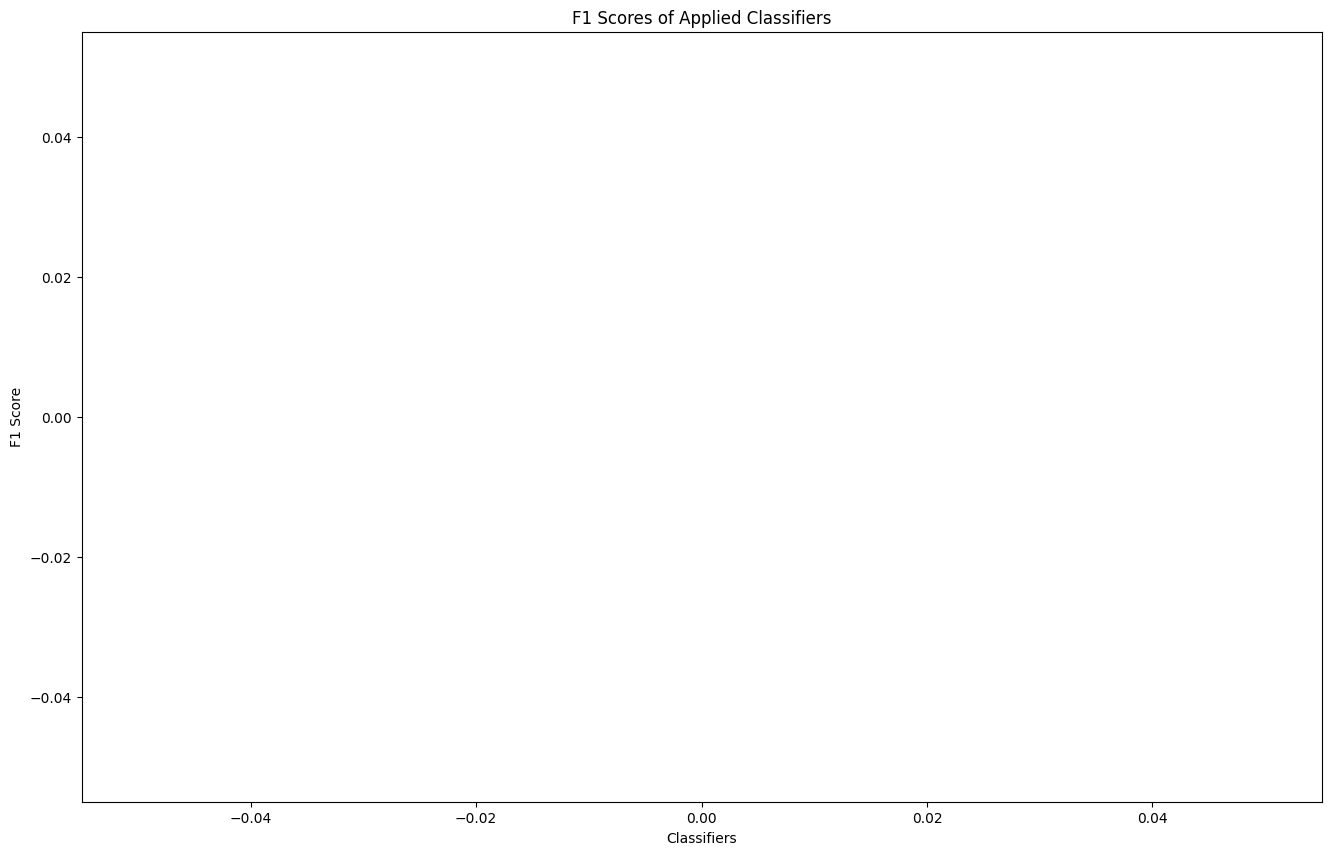

In [23]:
plt.figure(figsize=(16, 10))

plt.bar(classifiers, f1)

plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("F1 Scores of Applied Classifiers")
plt.show()


In [24]:
evaluate_model('BernoulliNB', BernoulliNB())
evaluate_model('GaussianNB', GaussianNB())
evaluate_model('MultinomialNB', MultinomialNB())
evaluate_model('RandomForestClassifier', RandomForestClassifier())
evaluate_model('DecisionTreeClassifier', DecisionTreeClassifier())
evaluate_model('KNeighborsClassifier', KNeighborsClassifier())


In [25]:
import pickle
import os

# Create models directory if it doesn't exist
models_dir = 'trained_models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Train and save all models
models = {
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    model_path = os.path.join(models_dir, f'{model_name}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved {model_name} to {model_path}")

print("\nAll models saved successfully!")


Saved BernoulliNB to trained_models\BernoulliNB.pkl
Saved GaussianNB to trained_models\GaussianNB.pkl
Saved MultinomialNB to trained_models\MultinomialNB.pkl
Saved RandomForestClassifier to trained_models\RandomForestClassifier.pkl
Saved DecisionTreeClassifier to trained_models\DecisionTreeClassifier.pkl
Saved KNeighborsClassifier to trained_models\KNeighborsClassifier.pkl

All models saved successfully!
Saved RandomForestClassifier to trained_models\RandomForestClassifier.pkl
Saved DecisionTreeClassifier to trained_models\DecisionTreeClassifier.pkl
Saved KNeighborsClassifier to trained_models\KNeighborsClassifier.pkl

All models saved successfully!
